# Column Transformation

To obtain a prediction with a better performance, it is needed to evaluate if feature in the model. To this aim, each of them will be explored to see if they have a normal distribution since they will be more meaningful to the model in this way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from modules.color_formater import colored

In [2]:
root = '../data/cars_reg.csv'

df = pd.read_csv(root)

df.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price,...,warranty_NO,warranty_YES,dealer_Individual,dealer_Professional,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,2,99,157,270,145,4.3,780,33,13.7,5500,...,0.0,1.0,0.0,1.0,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957
1,3,179,140,426,235,7.6,1373,55,7.2,10900,...,0.0,1.0,0.0,1.0,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315
2,4,109,142,453,222,4.2,1545,42,8.5,36100,...,0.0,1.0,0.0,1.0,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315
3,5,142,162,467,212,5.4,1740,67,8.0,28000,...,0.0,1.0,0.0,1.0,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315
4,2,488,123,446,189,21.0,1546,70,3.9,27990,...,0.0,1.0,0.0,1.0,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315


## Represent curves distribution

In [3]:
X = df.drop('price', axis=1)

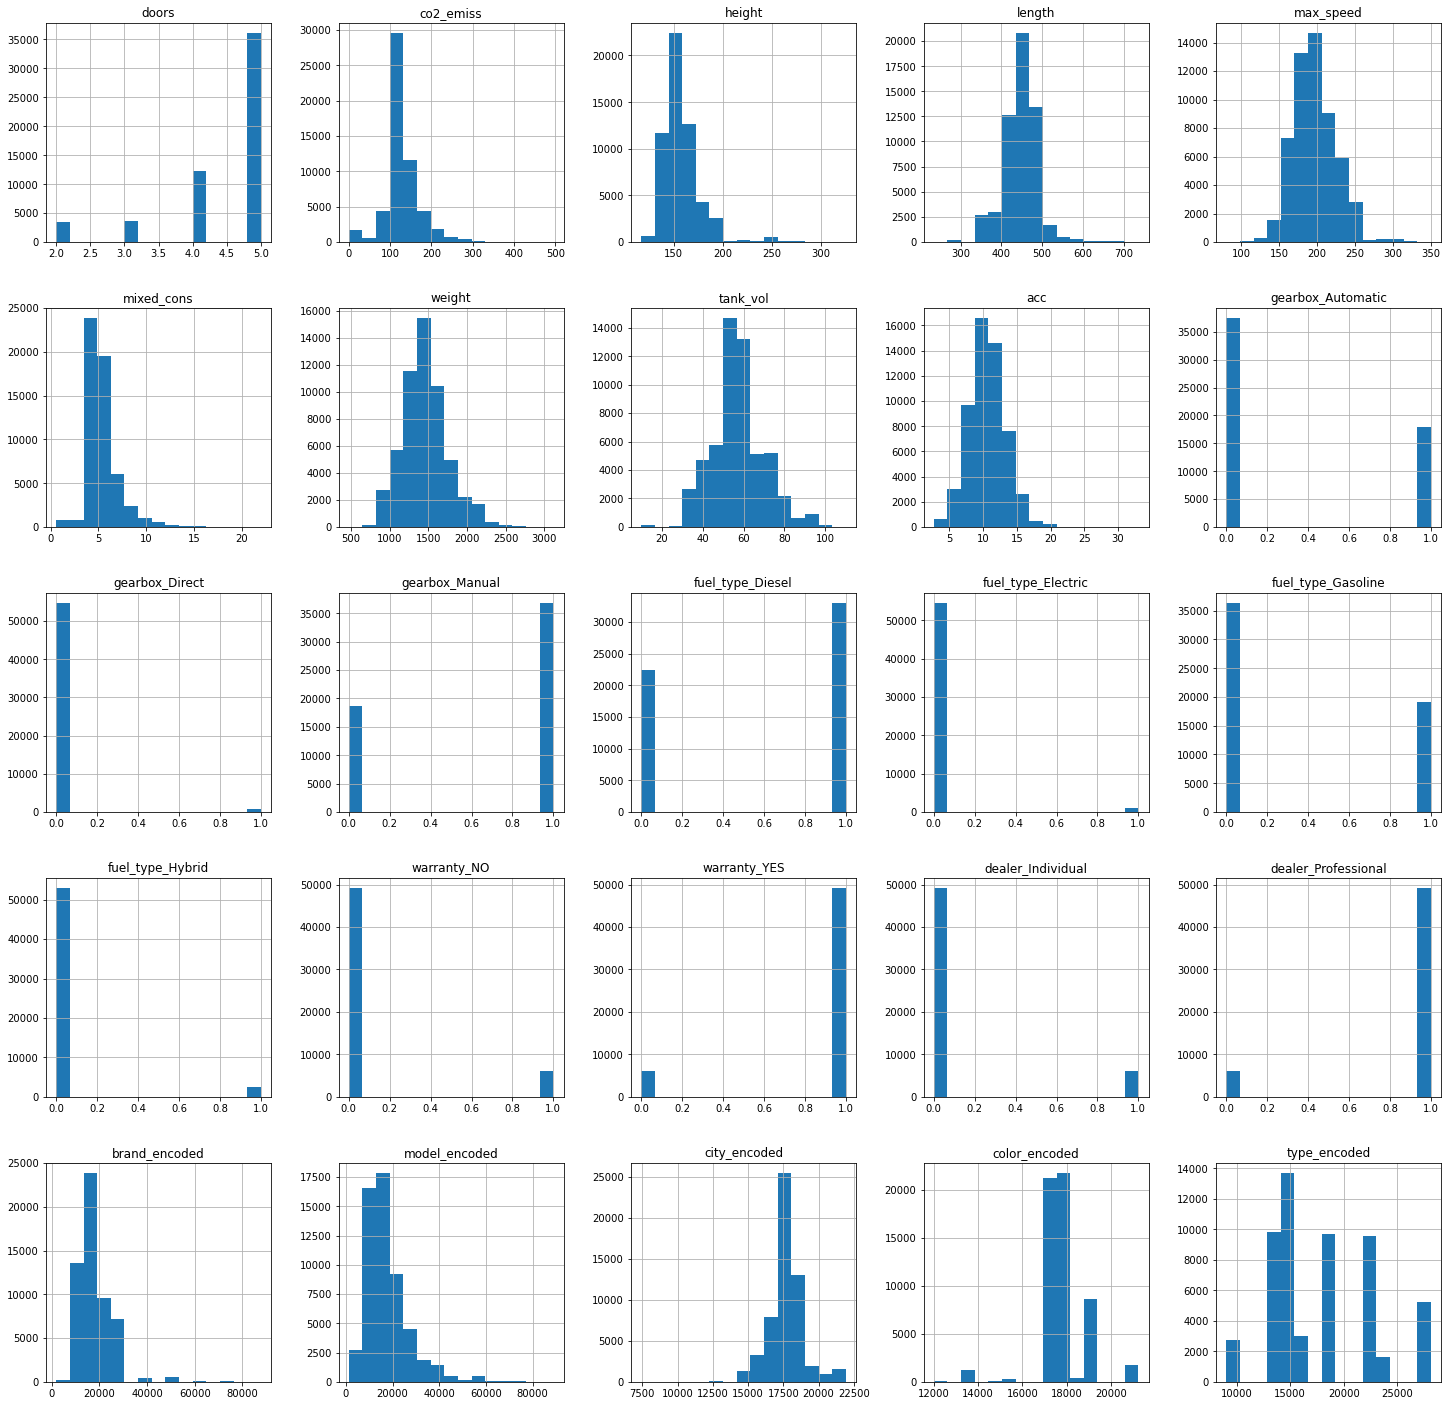

In [4]:
fig, axes = plt.subplots(len(X.columns)//5, 5, figsize=(25, 25))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        i += 1

First, we notice that `doors` column is categorical, so it is better to apply a `Binarizer` to this column.

In [5]:
from sklearn.preprocessing import LabelBinarizer

In [6]:
lb = LabelBinarizer()
lb.fit(X['doors'])
doors_trf = lb.transform(X['doors'])

In [7]:
doors_cols = []
for e in X['doors'].unique().tolist():
    col = 'doors_' + str(e)
    doors_cols.append(col)

doors_cols

['doors_2', 'doors_3', 'doors_4', 'doors_5']

In [8]:
ohe_doors = pd.DataFrame(doors_trf, columns=doors_cols)
X = pd.concat([X, ohe_doors], axis=1)
X.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,gearbox_Automatic,...,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded,doors_2,doors_3,doors_4,doors_5
0,2,99,157,270,145,4.3,780,33,13.7,1.0,...,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957,1,0,0,0
1,3,179,140,426,235,7.6,1373,55,7.2,0.0,...,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315,0,1,0,0
2,4,109,142,453,222,4.2,1545,42,8.5,1.0,...,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315,0,0,1,0
3,5,142,162,467,212,5.4,1740,67,8.0,1.0,...,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315,0,0,0,1
4,2,488,123,446,189,21.0,1546,70,3.9,1.0,...,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315,1,0,0,0


In [9]:
X.drop('doors', axis=1, inplace=True)

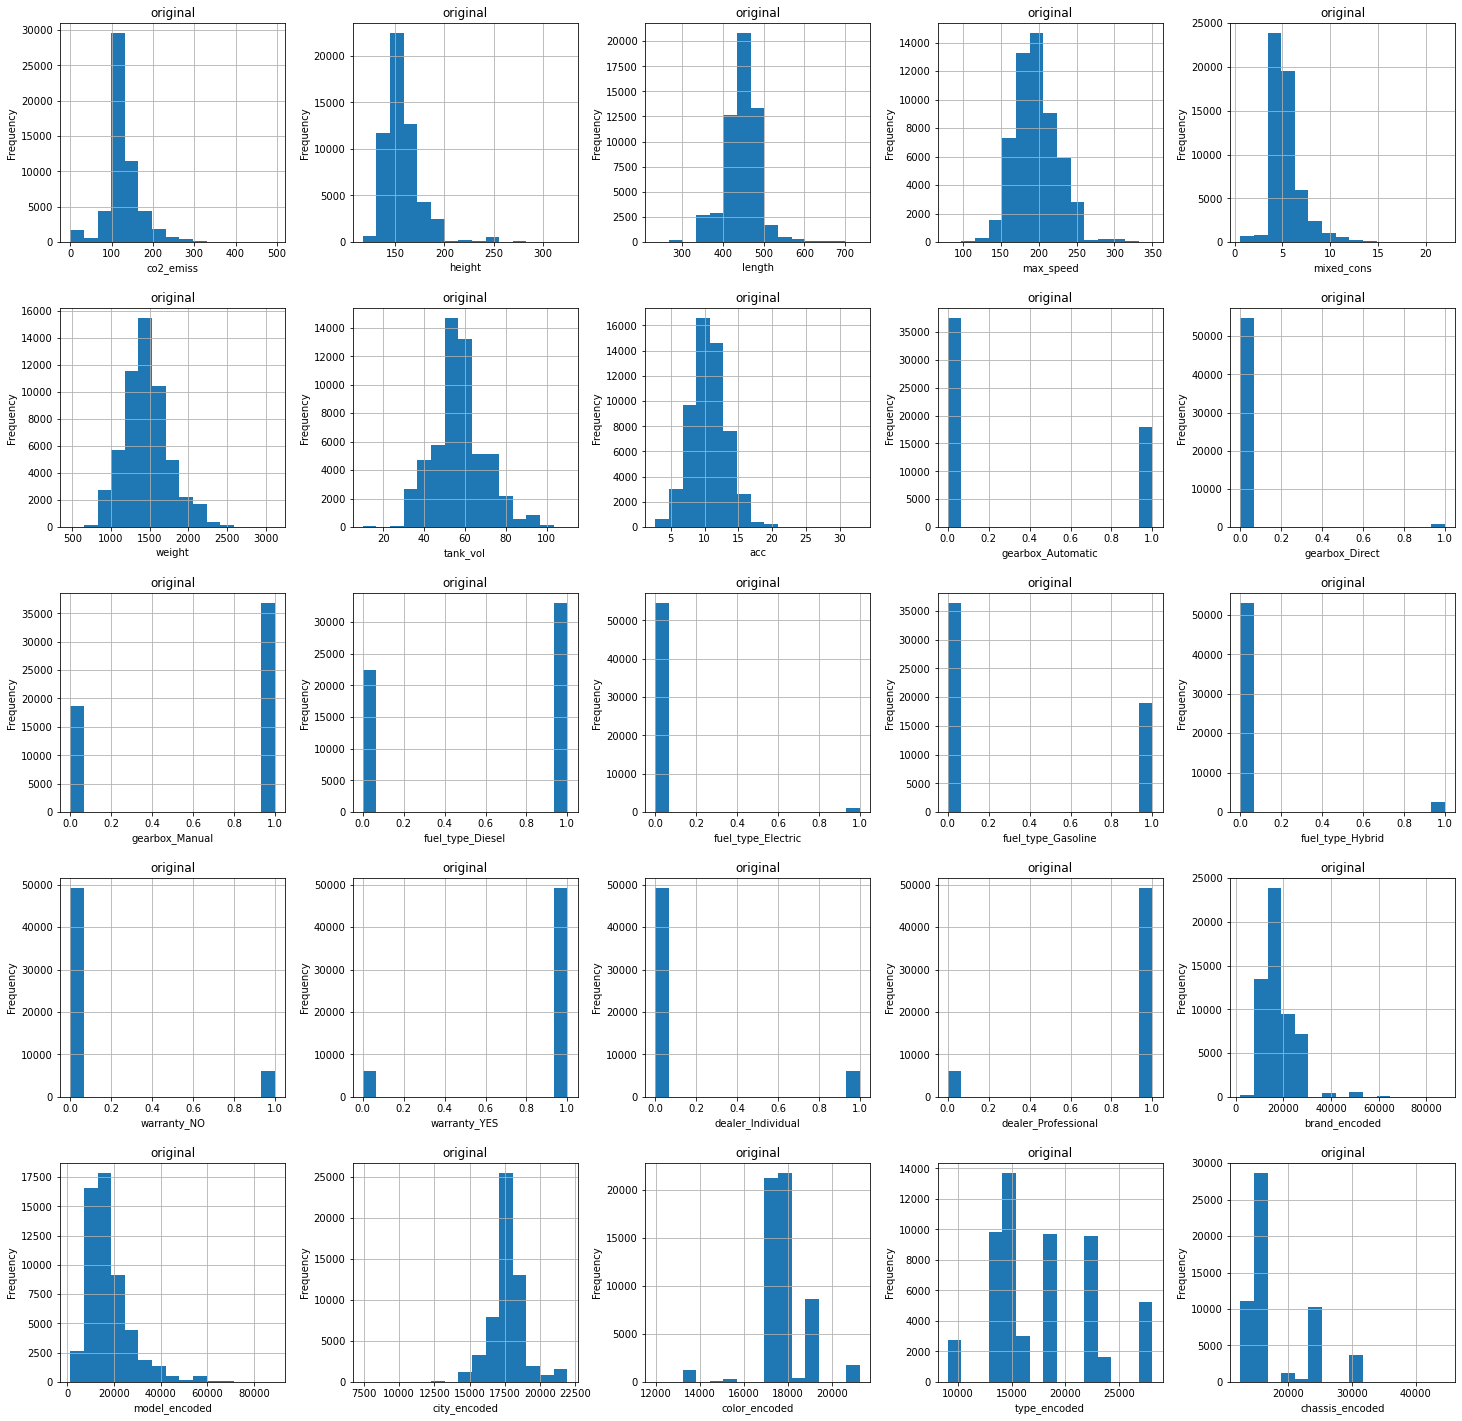

In [10]:
fig, axes = plt.subplots(len(X.columns)//5, 5, figsize=(25, 25))

i = 0
for pentaxis in axes:
    for axis in pentaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        axis.set_title('original')
        axis.set_xlabel(X.columns[i])
        axis.set_ylabel('Frequency')
        i += 1

### Separate binary columns (OneHotEncoded) from the ones with distributed values

In [11]:
ohe_mask = X.isin([0,1]).all()

X_ohe = X[X.columns[ohe_mask]]
X_dst = X[X.columns[~ohe_mask]]

display(X_ohe)
display(X_dst)

,gearbox_Automatic,gearbox_Direct,gearbox_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,warranty_NO,warranty_YES,dealer_Individual,dealer_Professional,doors_2,doors_3,doors_4,doors_5
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1,0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55361,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
55362,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
55363,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
55364,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1


,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,99,157,270,145,4.3,780,33,13.7,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957
1,179,140,426,235,7.6,1373,55,7.2,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315
2,109,142,453,222,4.2,1545,42,8.5,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315
3,142,162,467,212,5.4,1740,67,8.0,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315
4,488,123,446,189,21.0,1546,70,3.9,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55361,100,148,402,164,3.8,1237,45,14.8,12845.662341,11980.345216,18944.866410,16998.492107,24125.953305,15124.335073
55362,158,188,514,206,6.0,2145,67,9.1,26803.194521,40412.887500,17306.168324,19068.172062,24125.953305,14164.702259
55363,139,163,462,187,5.3,1828,60,10.9,25865.686411,28652.349939,15706.924710,17969.471689,24125.953305,23421.348833
55364,149,166,465,230,6.0,1800,67,6.2,23572.093803,29654.348315,18049.881613,16998.492107,24125.953305,23421.348833


## Power Transformations: Box-Cox and Yeo-Johnson

Many machine learning algorithms perform better when the distribution of variables is Gaussian. To this aim, `PowerTransformations` will be applied since they will make the probability distribution of a variable more Gaussian.

In [12]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [22]:
try:
    boxcox = PowerTransformer(method='box-cox', standardize=False)
    X_trf = boxcox.fit_transform(X)
except ValueError as e:
    print(colored(255, 118, 118, f'ValueError: {e}'))

ValueError: The Box-Cox transformation can only be applied to strictly positive data 


This error states that we cannot use the transform if the data is not `strictly positive`. Therefore, it is needed to firstly apply a `MinMaxScaler` using a `Pipeline`.

Applying [Chang & Hug](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py) map of preprocessing data to a normal distribution.

In [24]:
distributions = []
for i in range(0, len(X.columns)):
    name = X.columns[i]
    array = X[X.columns[i]].to_numpy().reshape(-1,1)
    distributions.append((name, array))
    
distributions[:2]

[('co2_emiss',
  array([[ 99],
         [179],
         [109],
         ...,
         [139],
         [149],
         [132]])),
 ('height',
  array([[157],
         [140],
         [142],
         ...,
         [163],
         [166],
         [163]]))]

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


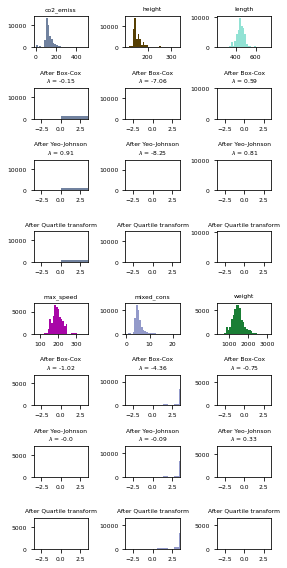

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from modules.color_formater import random_hex_colors

FONT_SIZE = 6
BINS = 30

# setting preprocessing methods: PowerTransformer (Box-Cox, Yeo-Johnson); QuantileTransformer
scaler = MinMaxScaler(feature_range=(1, 2))
boxcox = PowerTransformer(method='box-cox')
bc = Pipeline(steps=[('s', scaler), ('bc', boxcox)])

yj = PowerTransformer(method='yeo-johnson')

rng = np.random.RandomState(304)
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)

# adding distributions of columns
distributions = []
for i in range(0, len(X.columns)):
    name = X.columns[i]
    array = X[X.columns[i]].to_numpy().reshape(-1,1)
    distributions.append((name, array))

colors = random_hex_colors(29)

# generating the plot
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2)) # cols = num of preprocessing methods + original
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X_col = distribution
    X_train, X_test = train_test_split(X_col, test_size=0.2, random_state=rng)
    
    # perform power and quantile transforms
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.named_steps['bc'].lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)
    
    ax_original, ax_bc, ax_yj, ax_qt = axes
    
    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    
    for ax, X_trans, meth_name, lmbda in zip(
                                            (ax_bc, ax_yj, ax_qt),
                                            (X_trans_bc, X_trans_yj, X_trans_qt),
                                            ('Box-Cox', 'Yeo-Johnson', 'Quartile transform'),
                                            (lmbda_bc, lmbda_yj, None)
                                            ):
        ax.hist(X_train, color=color, bins=BINS)
        title = f'After {meth_name}'
        if lmbda is not None:
            title += f'\n$\lambda$ = {lmbda}'
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])
    
plt.tight_layout()
plt.show()

## Standardizing columns: StandardScaler, MinMaxScaler

## PCA: Reduce Dimensionality